In [120]:
# 5.2 (16 points) The file www.nbi.dk/∼petersen/data NeuronResponse.csv contains the response strength of neurons (RS) 
# as a function of stimulus orientation (θ) with uncertainties, for trials
# A and B.
# • Fit the A-trial data in the range θ ∈ [0, 15] with a second degree polynomial P2.
# • Assuming that P2 is the correct functional form, evaluate the uncertainties.
# • Fit the B-trial data in the entire range of θ with function(s) of your choice. Comment on
# their overall and mutual quality.
# • Plot the A- and B-trial results against each other, and determine if they follow a proportinal
# (RSB = c1RSa) or a shifted (RSB = RSa + c2) relation, or non of the two. Comment on
# how certain you are.


In [121]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [122]:
url="http://www.nbi.dk/~petersen/data_NeuronResponse.csv"
dataframe = pd.read_csv(url)
df=pd.DataFrame()
df[['theta', 'RS_A', 'sigmaRS_A', 'RS_B', 'sigmaRS_B']]=dataframe['# theta RS_A sigmaRS_A RS_B sigmaRS_B'].str.split(' ', expand=True)
theta, RS_A, sigmaRS_A, RS_B, sigmaRS_B=df.values.T.astype(float)
df

,theta,RS_A,sigmaRS_A,RS_B,sigmaRS_B
0,0.00,773.49,48.46,938.61,46.77
1,1.01,701.14,48.48,895.91,57.24
2,2.02,747.14,38.29,857.31,63.63
3,3.03,715.14,41.54,865.62,59.12
4,4.04,728.18,41.90,895.49,47.15
...,...,...,...,...,...
85,85.96,0.11,1.26,0.57,1.41
86,86.97,0.89,1.29,0.55,1.33
87,87.98,1.22,1.07,-0.55,1.05
88,88.99,0.64,1.04,0.10,1.18


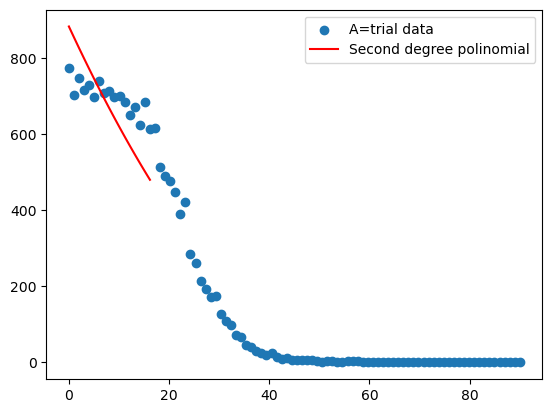

In [123]:

# Fit a second-degree polynomial to the data
coefficients = np.polyfit(theta, RS_A, 2)

# Evaluate the polynomial over a range of x values
theta_range = np.linspace(theta[0], theta[16])
trial_range = np.polyval(coefficients, theta_range)

# Plot the data and the fitted polynomial
plt.scatter(theta, RS_A, label="A=trial data")
plt.plot(theta_range, trial_range, color='red', label="Second degree polinomial")
plt.legend()
plt.show()